In [48]:
import numpy as np
import pandas as pd

# Đọc dữ liệu

In [49]:

# Đọc tệp CSV
file_name = r"C:\Users\hoang\Downloads\Viz\foodstruct_nutritional_facts_updated_rounded.csv"  
df = pd.read_csv(file_name, encoding="ISO-8859-1")

# Hiển thị 10 dòng đầu tiên
df.head(10)

,Food Name,Category Name,Calories,Carbs,Fats,Fiber,Protein,Sugar,Density
0,Acerola,Fruits,32,7.7,0.30,1.1,0.40,8.95,0.0
1,Apple,Fruits,52,14.0,0.17,2.4,0.26,10.00,0.0
2,Apricot,Fruits,48,11.0,0.39,2.0,1.40,9.20,0.0
3,Dried fruit,Fruits,241,63.0,0.51,7.3,3.40,53.00,0.0
4,Avocado,Fruits,160,8.5,15.00,6.7,2.00,0.66,0.0
5,Banana,Fruits,89,23.0,0.33,2.6,1.10,12.00,0.0
6,Blackberry,Fruits,43,9.6,0.49,5.3,1.40,4.90,0.0
7,Blueberry,Fruits,57,14.0,0.33,2.4,0.74,10.00,0.0
8,Boysenberries,Fruits,50,12.0,0.26,5.3,1.10,6.90,0.0
9,Breadfruit,Fruits,103,27.0,0.23,4.9,1.10,11.00,0.0


# Biểu đồ trực quan

## Heatmap

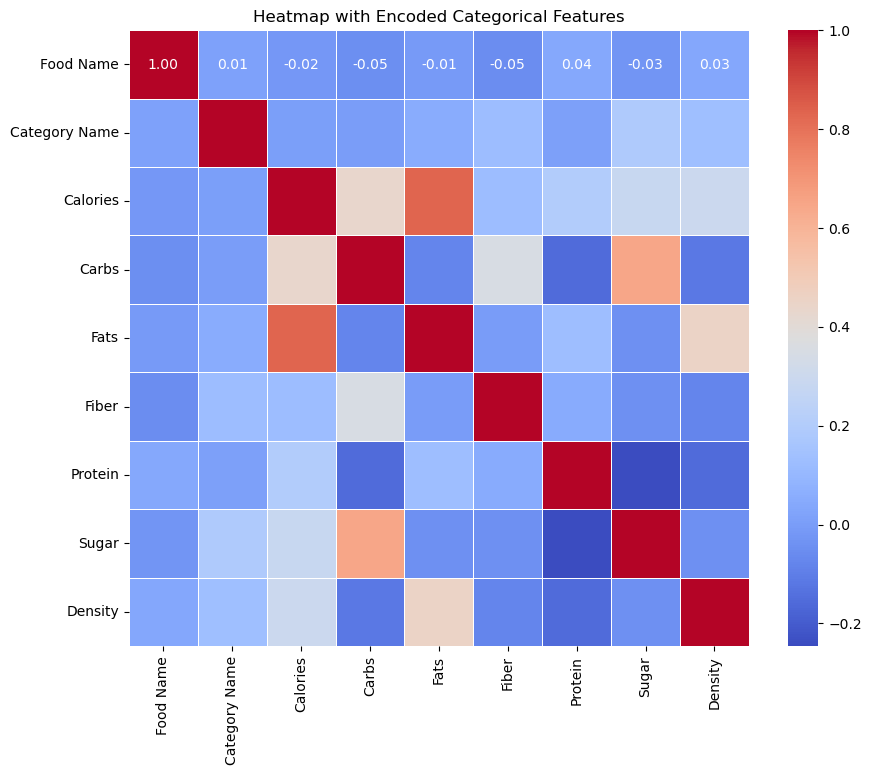

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Sao chép dataframe để tránh thay đổi dữ liệu gốc
df_encoded = df.copy()

# Mã hóa các cột phân loại
label_encoders = {}
for col in ["Food Name", "Category Name"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Vẽ heatmap với dữ liệu đã mã hóa
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap with Encoded Categorical Features")
plt.show()


# Histogram for each nutrient

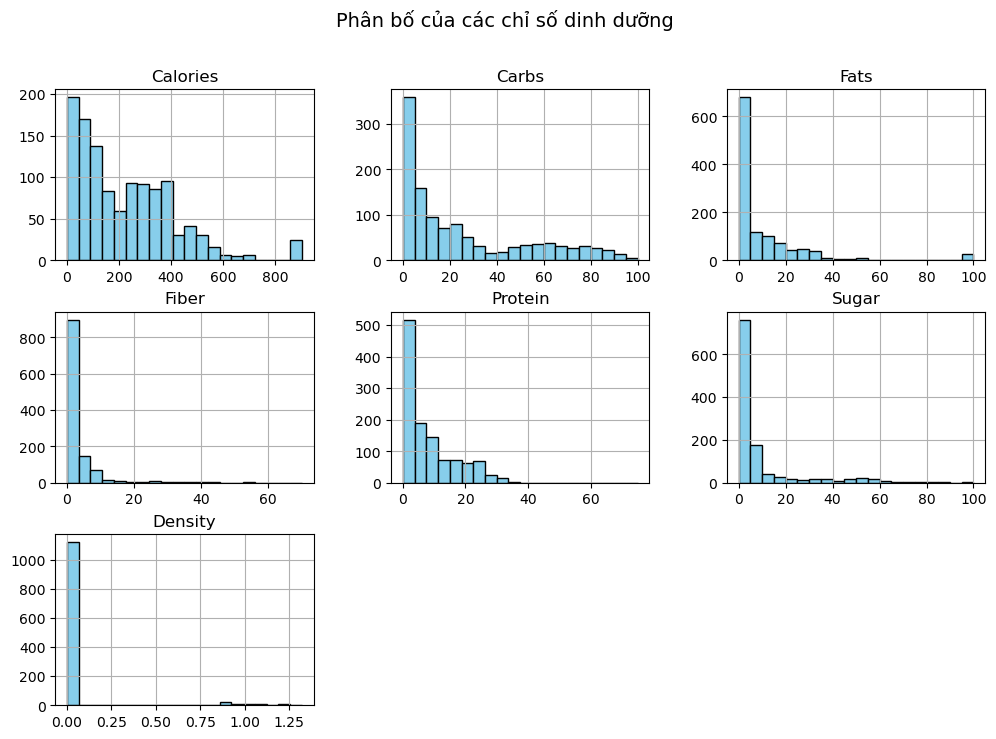

In [51]:
# Vẽ histogram để xem phân bố của các chỉ số dinh dưỡng
df.iloc[:, 2:].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Phân bố của các chỉ số dinh dưỡng", fontsize=14)
plt.show()


# Grouped bar chart for each nutrient

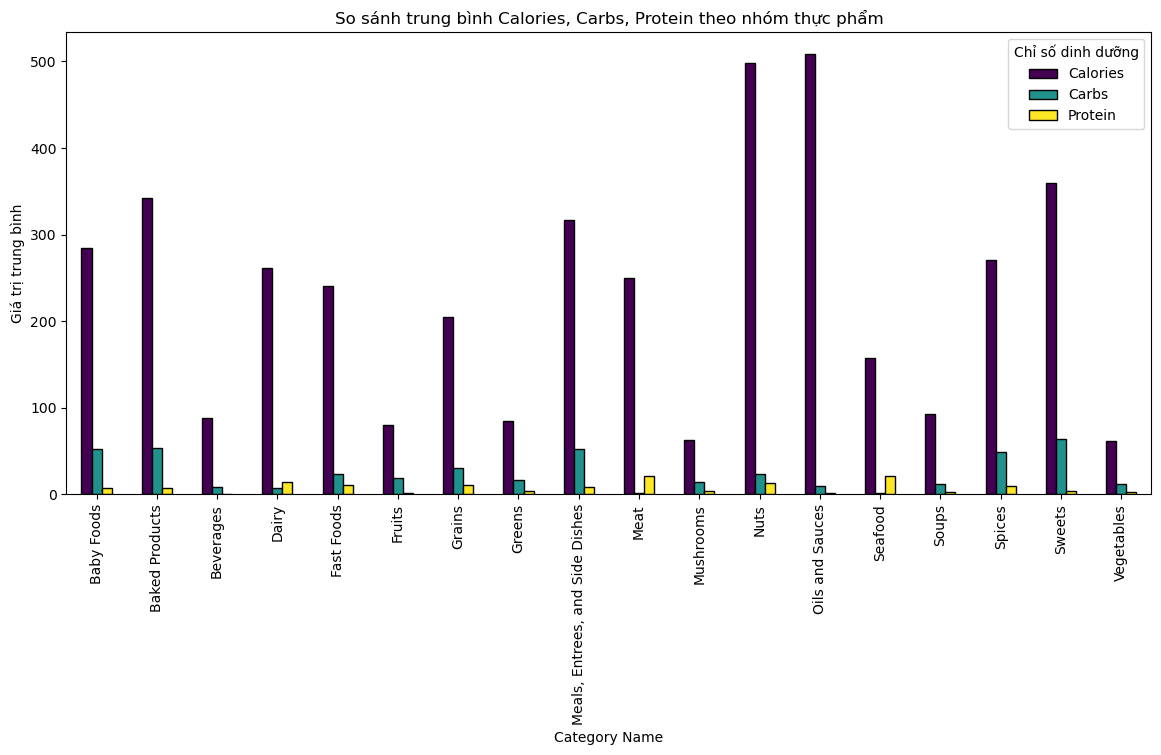

In [52]:
# Tính trung bình các chỉ số dinh dưỡng theo nhóm thực phẩm
category_means = df.groupby("Category Name")[["Calories", "Carbs", "Protein"]].mean()

# Vẽ biểu đồ so sánh giữa các nhóm thực phẩm
category_means.plot(kind="bar", figsize=(14, 6), colormap="viridis", edgecolor="black")
plt.title("So sánh trung bình Calories, Carbs, Protein theo nhóm thực phẩm")
plt.ylabel("Giá trị trung bình")
plt.xticks(rotation=90)
plt.legend(title="Chỉ số dinh dưỡng")
plt.show()


# Density distribution plot (KDE plot) for nutritional components

c:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

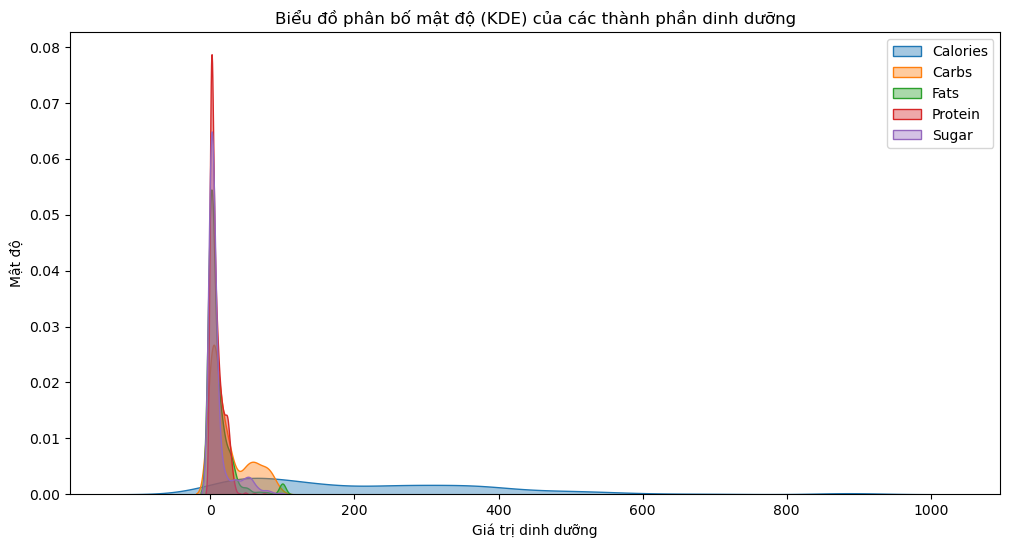

In [53]:
# Vẽ biểu đồ phân bố mật độ (KDE plot) cho các thành phần dinh dưỡng
plt.figure(figsize=(12, 6))
for column in ["Calories", "Carbs", "Fats", "Protein", "Sugar"]:
    sns.kdeplot(df[column], label=column, fill=True, alpha=0.4)

plt.title("Biểu đồ phân bố mật độ (KDE) của các thành phần dinh dưỡng")
plt.xlabel("Giá trị dinh dưỡng")
plt.ylabel("Mật độ")
plt.legend()
plt.show()


# Violin Plot for Calories, Carbs, and Protein by Food Group

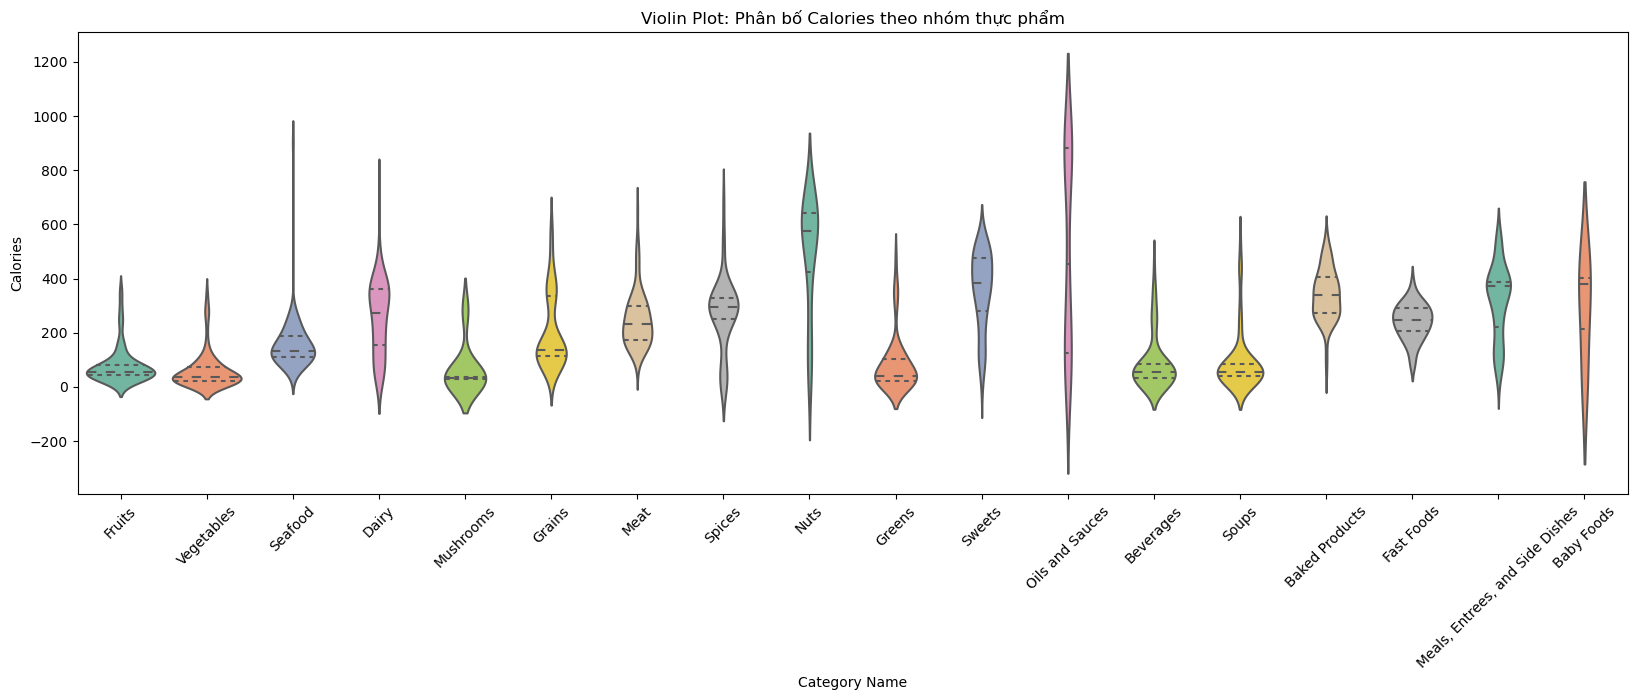

In [54]:
import plotly.express as px
!pip install squarify
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import parallel_coordinates
import squarify

# Lựa chọn các nhóm thực phẩm phổ biến (giới hạn 10 nhóm để dễ đọc)
top_categories = df["Category Name"].value_counts().index[:18]
df_filtered = df[df["Category Name"].isin(top_categories)]

# Vẽ Violin Plot cho Calories, Carbs, Protein theo nhóm thực phẩm
plt.figure(figsize=(20, 6))
sns.violinplot(x="Category Name", y="Calories", data=df_filtered, palette="Set2", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot: Phân bố Calories theo nhóm thực phẩm")
plt.show()


# Radar Chart

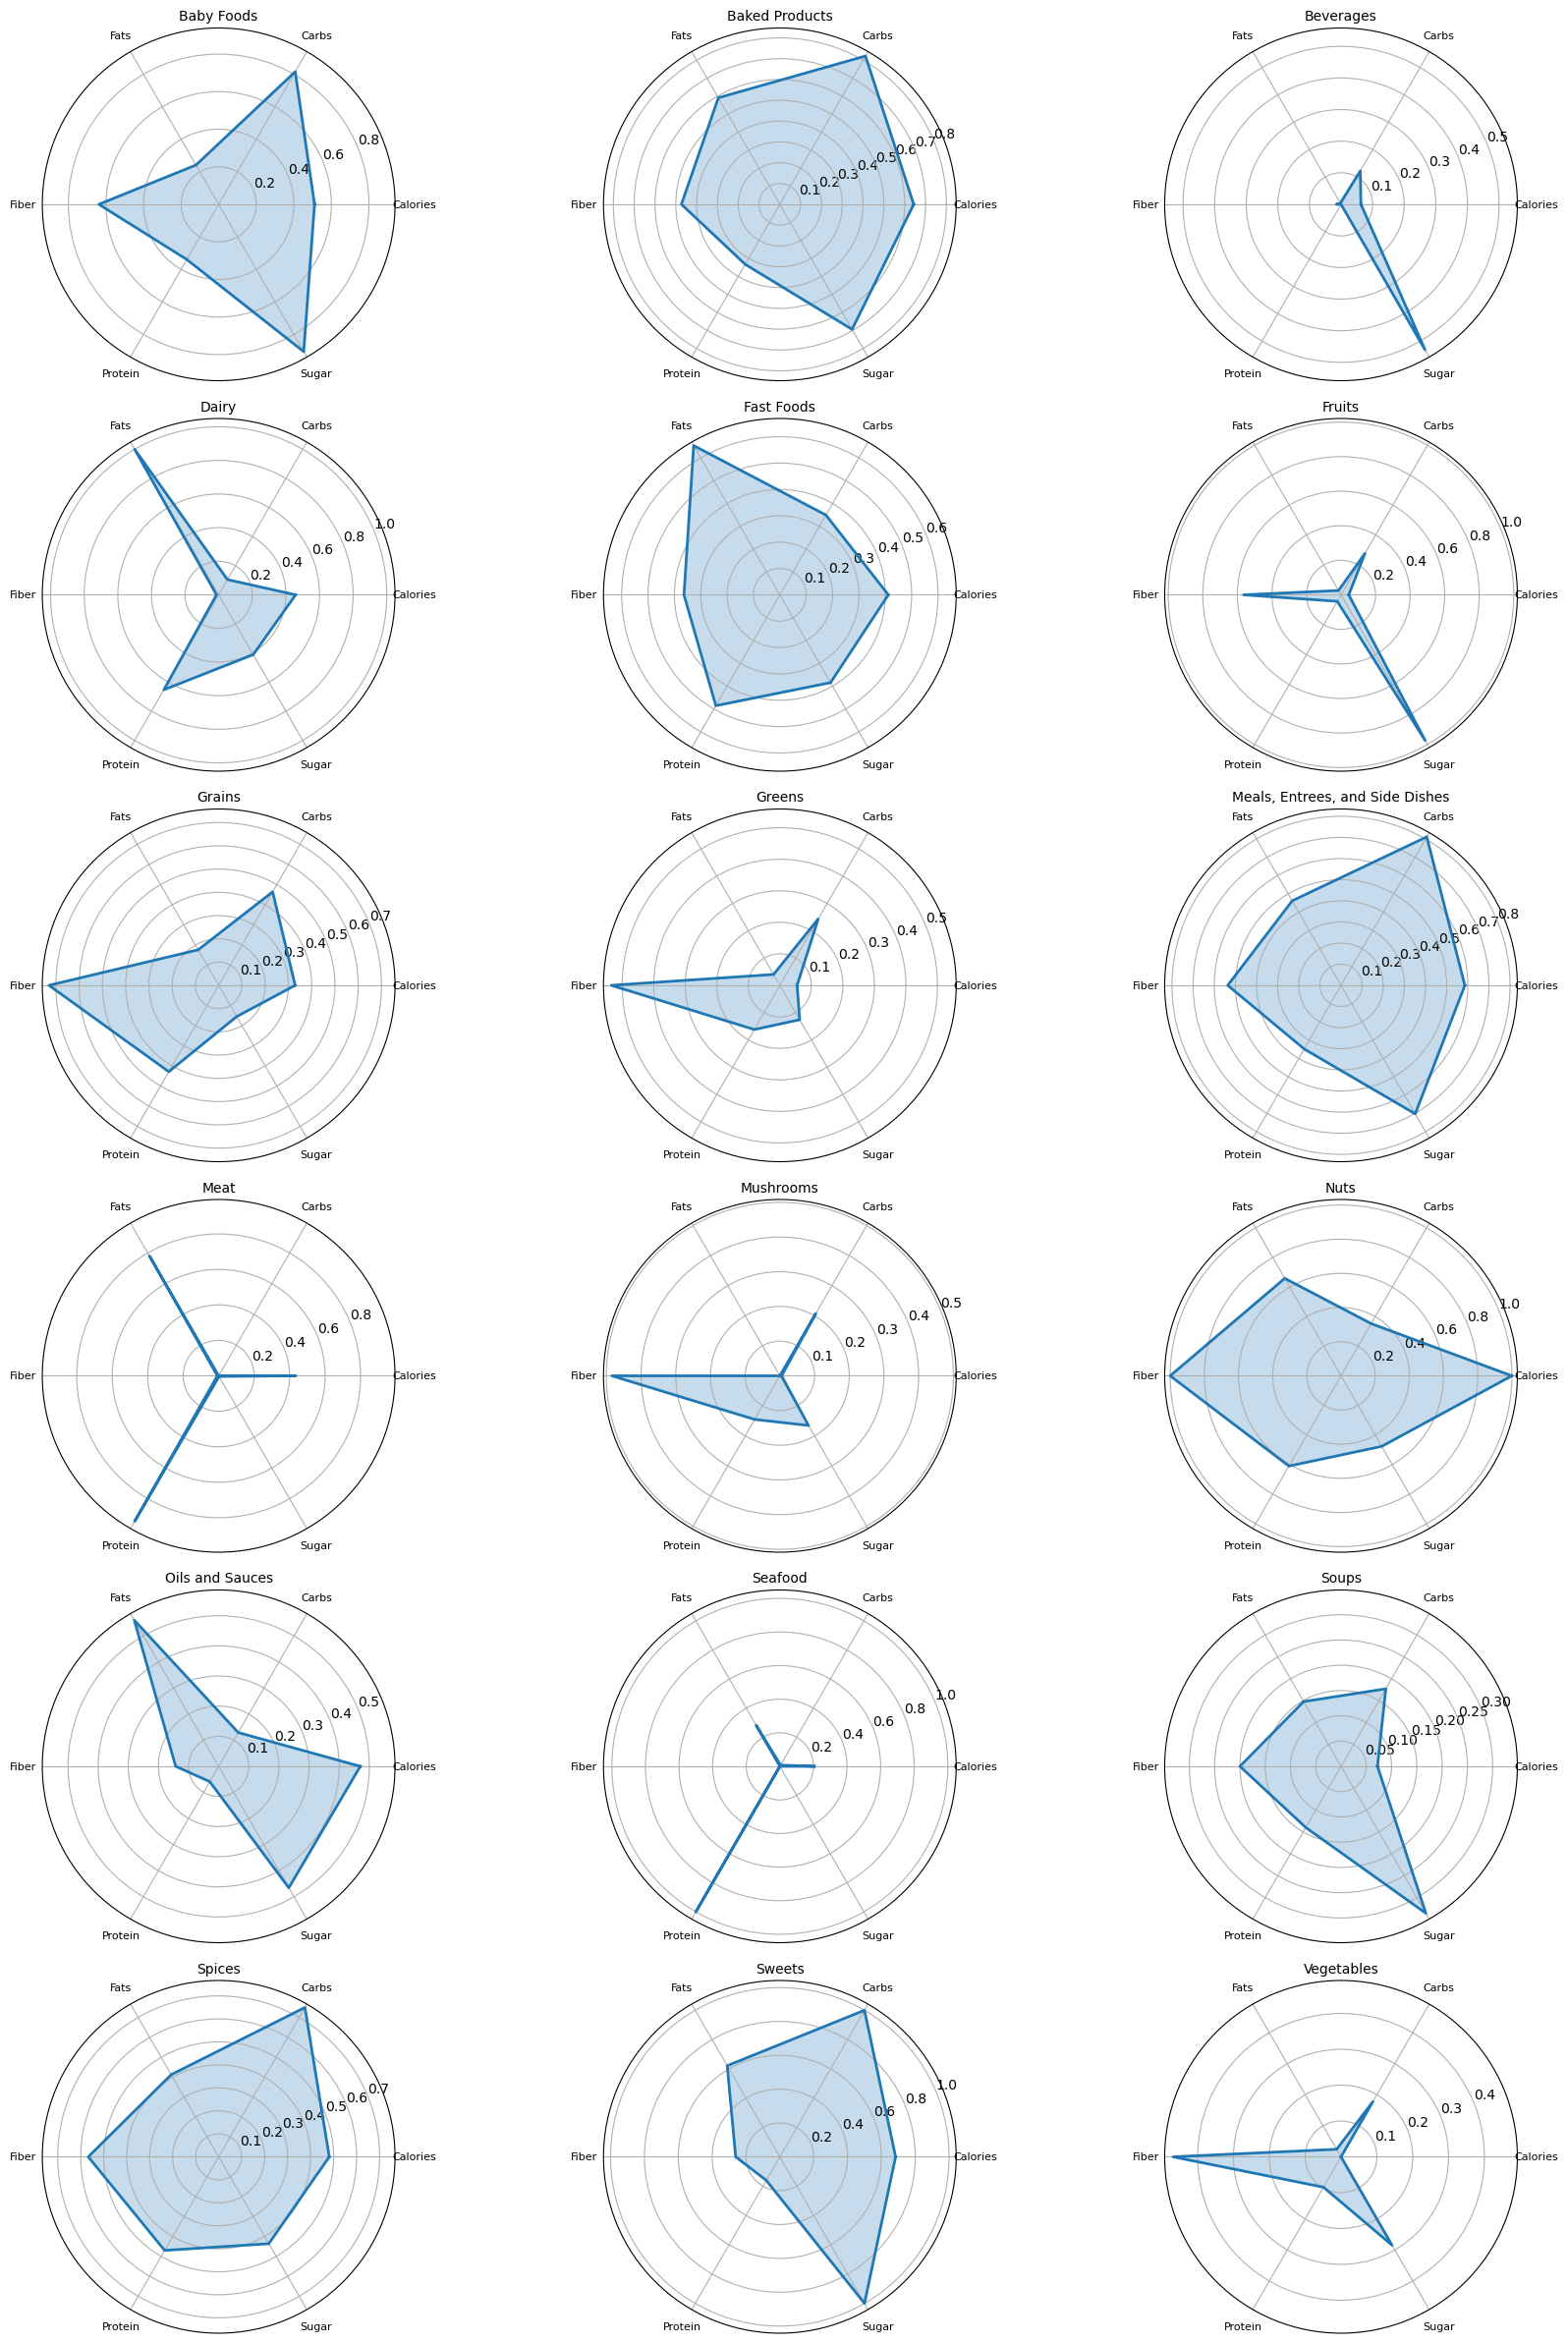

In [65]:
scaler = MinMaxScaler()
df_radar_normalized = pd.DataFrame(scaler.fit_transform(df_grouped), index=df_grouped.index, columns=df_grouped.columns)
categories = numerical_cols
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

fig, axes = plt.subplots(6, 3, figsize=(18, 24), subplot_kw=dict(polar=True))
axes = axes.flatten()

for idx, (label, row) in enumerate(df_radar_normalized.iterrows()):
    values = row.tolist()
    values += values[:1]  # Lặp lại giá trị đầu tiên để đóng vòng tròn
    angle_loop = angles + angles[:1]  # Lặp lại góc đầu tiên
    
    ax = axes[idx]
    ax.plot(angle_loop, values, label=label, linewidth=2, linestyle="solid")
    ax.fill(angle_loop, values, alpha=0.25)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, fontsize=8)
    ax.set_title(label, fontsize=10)

plt.tight_layout()
plt.show()

# Boxplot before outlier processing

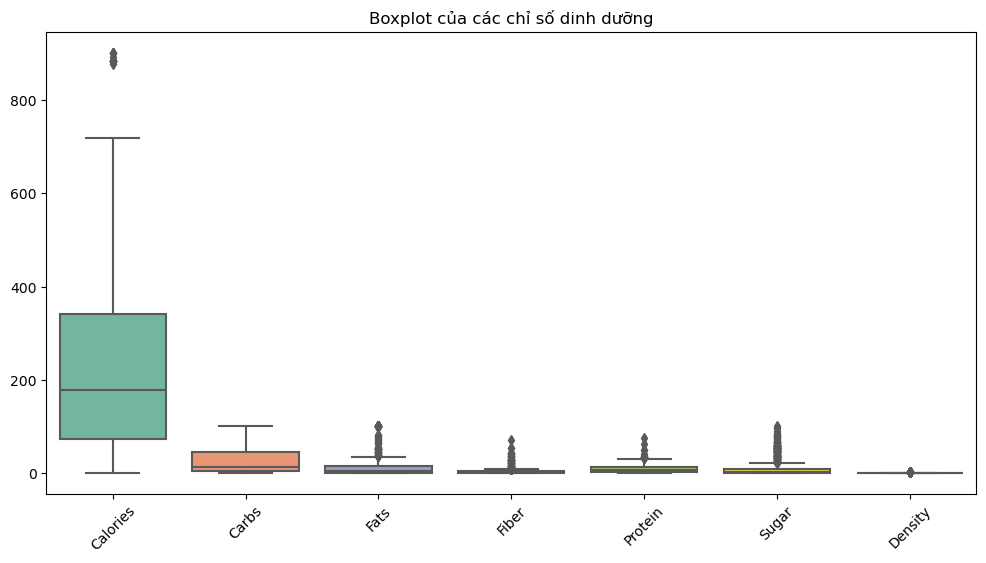

In [56]:
# Vẽ boxplot để phát hiện giá trị ngoại lai
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 2:], palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot của các chỉ số dinh dưỡng")
plt.show()


## Outlier handling using IQR

In [57]:
import numpy as np

# Xác định các cột số để kiểm tra ngoại lai
numerical_cols = ["Calories", "Carbs", "Fats", "Fiber", "Protein", "Sugar", "Density"]

# Hàm xác định ngoại lai bằng IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Tìm ngoại lai trong các cột số
outlier_dict = {col: detect_outliers_iqr(df, col) for col in numerical_cols}

# Đếm số lượng ngoại lai trong mỗi cột
outlier_counts = {col: len(outlier_dict[col]) for col in numerical_cols}
outlier_counts


{'Calories': 25,
 'Carbs': 0,
 'Fats': 71,
 'Fiber': 95,
 'Protein': 16,
 'Sugar': 153,
 'Density': 54}

In [58]:
# Hàm xử lý ngoại lai bằng IQR (giới hạn giá trị trong phạm vi hợp lý)
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Thay thế giá trị ngoại lai bằng ngưỡng giới hạn
    data[column] = np.where(data[column] < lower_bound, Q1, data[column])
    data[column] = np.where(data[column] > upper_bound, Q3, data[column])

# Áp dụng xử lý ngoại lai cho các cột số
for col in numerical_cols:
    cap_outliers_iqr(df, col)

# Kiểm tra lại số lượng ngoại lai sau khi xử lý
outlier_dict_after = {col: detect_outliers_iqr(df, col) for col in numerical_cols}
outlier_counts_after = {col: len(outlier_dict_after[col]) for col in numerical_cols}
outlier_counts_after


{'Calories': 0,
 'Carbs': 0,
 'Fats': 0,
 'Fiber': 0,
 'Protein': 0,
 'Sugar': 0,
 'Density': 0}

# Boxplot after outlier processing

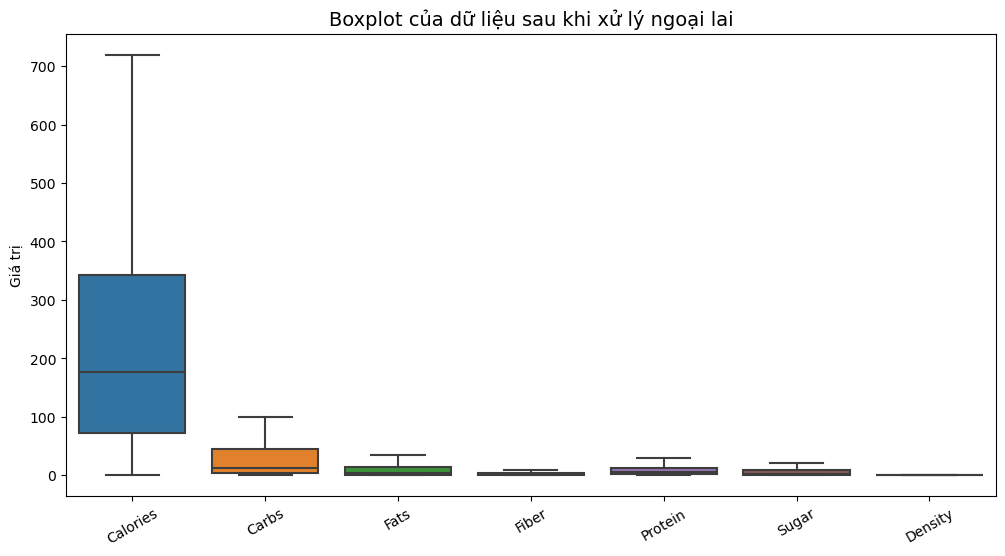

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ boxplot cho các cột số sau khi xử lý ngoại lai
sns.boxplot(data=df[numerical_cols])

# Thiết lập tiêu đề và nhãn
plt.title("Boxplot của dữ liệu sau khi xử lý ngoại lai", fontsize=14)
plt.xticks(rotation=30)
plt.ylabel("Giá trị")

# Hiển thị biểu đồ
plt.show()


# Food classification

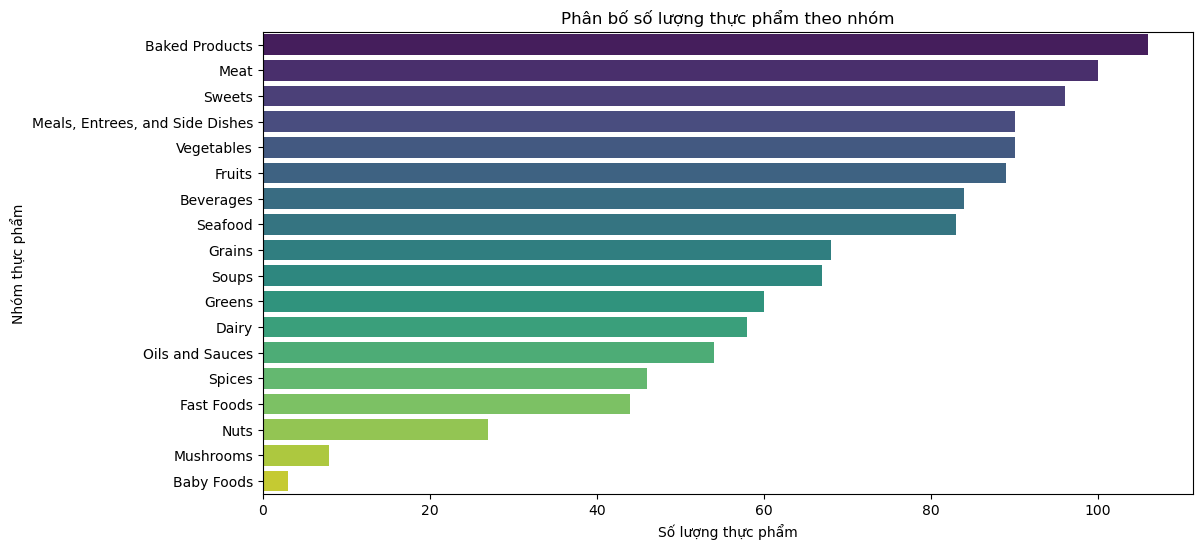

In [60]:
# Ánh xạ trực tiếp Category Name thành cụm
category_to_cluster = {category: idx for idx, category in enumerate(df["Category Name"].unique())}
df["Cluster"] = df["Category Name"].map(category_to_cluster)

# Vẽ biểu đồ phân bố số lượng thực phẩm theo nhóm
plt.figure(figsize=(12, 6))
sns.countplot(y=df["Category Name"], order=df["Category Name"].value_counts().index, palette="viridis")
plt.xlabel("Số lượng thực phẩm")
plt.ylabel("Nhóm thực phẩm")
plt.title("Phân bố số lượng thực phẩm theo nhóm")
plt.show()


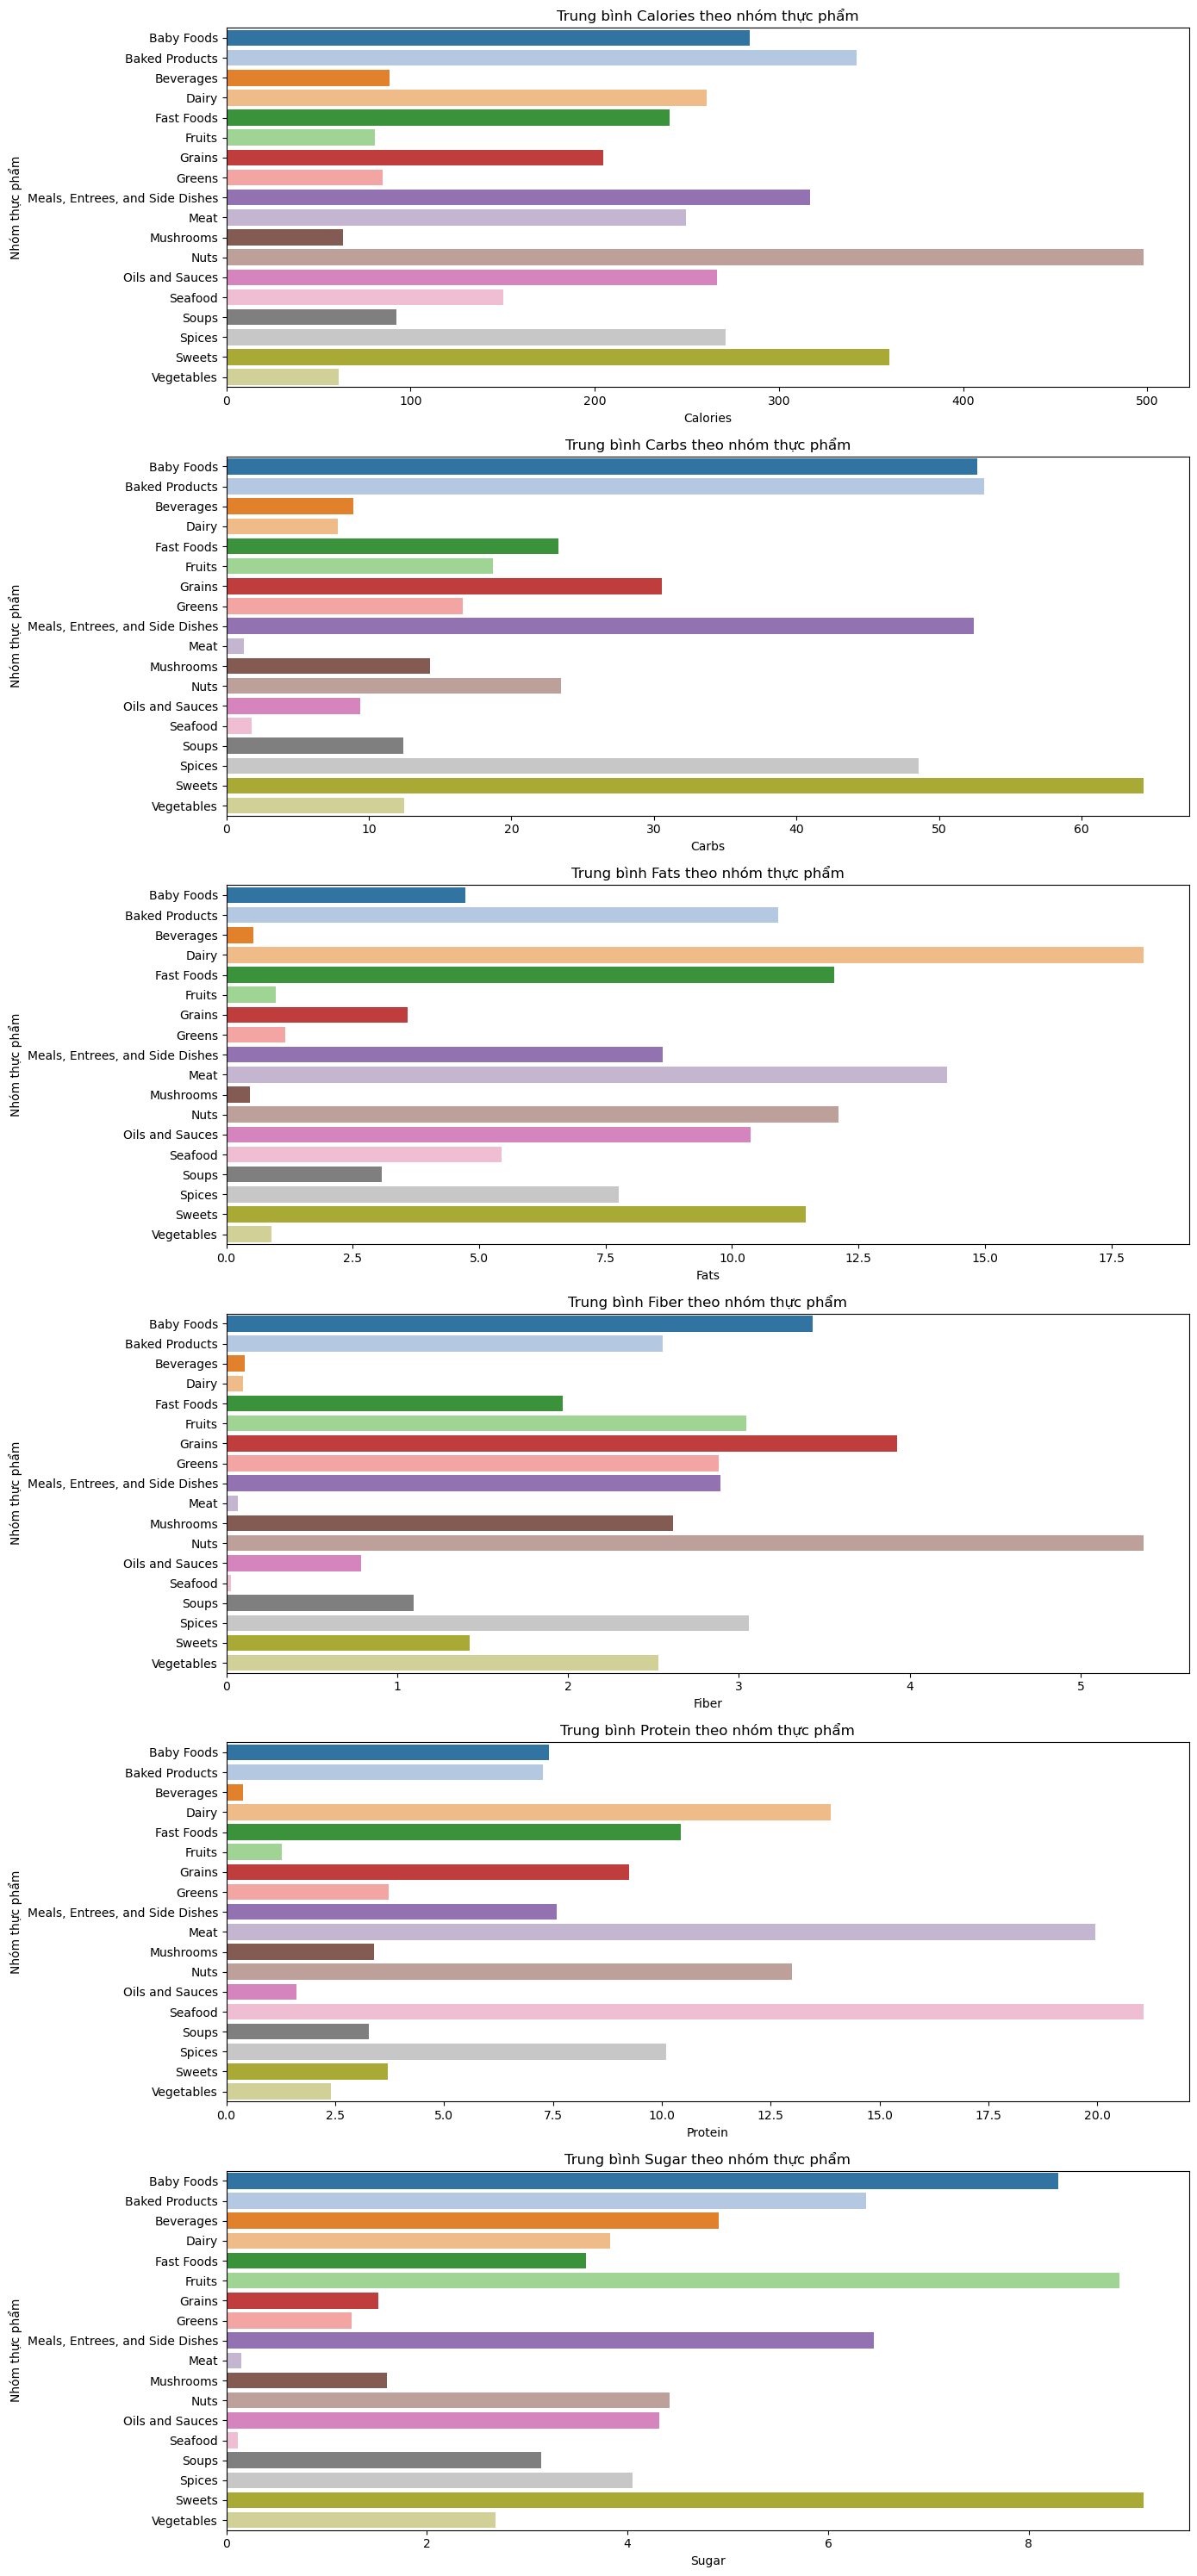

In [61]:
# Xác định các cột số để xử lý ngoại lai
numerical_cols = ["Calories", "Carbs", "Fats", "Fiber", "Protein", "Sugar"]

# Tính trung bình các chất dinh dưỡng theo cụm
df_grouped = df.groupby("Category Name")[numerical_cols].mean()

# Vẽ biểu đồ trung bình các chất dinh dưỡng theo từng nhóm thực phẩm (biểu đồ cột)
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(14, 30))
for i, col in enumerate(numerical_cols):
    sns.barplot(y=df_grouped.index, x=df_grouped[col], ax=axes[i], palette="tab20")
    axes[i].set_title(f"Trung bình {col} theo nhóm thực phẩm")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Nhóm thực phẩm")
plt.tight_layout()
plt.show()

# Train model 

In [62]:
import pandas as pd
import tkinter as tk
from tkinter import ttk

def load_nutrition_data(file_path):
    return pd.read_csv(file_path, encoding="ISO-8859-1")

def calculate_nutrition(recipe, nutrition_data):
    """Calculate total nutrition for a given recipe."""
    total_nutrition = {"Calories": 0, "Carbs": 0, "Fats": 0, "Fiber": 0, "Protein": 0, "Sugar": 0, "Density": 0}
    
    # Chuyển đổi đơn vị sang gam
    conversion_factors = {'teaspoons': 4.9289, 'tablespoons': 14.7868, 'cups': 236.588, 'clove': 7, 'g': 1}

    for ingredient, amount, unit in recipe:
        nutrition_row = nutrition_data[nutrition_data['Food Name'] == ingredient]
        if nutrition_row.empty:
            print(f"Warning: No data for {ingredient}")
            continue

        grams = amount * conversion_factors.get(unit, 1)  # Chuyển đổi sang gam

        # Lấy thông tin dinh dưỡng
        nutrition_values = nutrition_row.iloc[0][["Calories", "Carbs", "Fats", "Fiber", "Protein", "Sugar", "Density"]]

        # Kiểm tra nếu nguyên liệu là dầu hoặc sốt thì nhân thêm mật độ (Density)
        category = ingredient.lower()
        if any(keyword in category for keyword in ["oil", "sauce", "butter", "dressing"]):
            grams *= nutrition_values["Density"]

        # Cộng dồn giá trị dinh dưỡng vào tổng
        for key in total_nutrition:
            total_nutrition[key] += (nutrition_values[key] / 100) * grams

    return total_nutrition

def suggest_unit(*args):
    selected_food = food_var.get().lower()
    if any(keyword in selected_food for keyword in ["oil", "butter", "dressing"]):
        unit_dropdown.config(values=['teaspoons', 'tablespoons'])
        unit_var.set('tablespoons')
    elif any(keyword in selected_food for keyword in ["juice", "milk", "water", "beverage"]):
        unit_dropdown.config(values=['cups'])
        unit_var.set('cups')
    elif any(keyword in selected_food for keyword in ["garlic", "onion"]):
        unit_dropdown.config(values=['clove'])
        unit_var.set('clove')
    else:
        unit_dropdown.config(values=['g'])
        unit_var.set('g')

def filter_foods(*args):
    search_text = food_var.get().lower()
    filtered_foods = [food for food in food_list if search_text in food.lower()]
    food_dropdown.config(values=filtered_foods)

def add_food():
    selected_food = food_var.get()
    amount = float(amount_entry.get())
    unit = unit_var.get()
    recipe.append((selected_food, amount, unit))
    recipe_listbox.insert(tk.END, f"{selected_food}: {amount}{unit}")

def calculate_total():
    result = calculate_nutrition(recipe, nutrition_data)
    result_label.config(text=(
        f"Calories: {result['Calories']:.2f}, Carbs: {result['Carbs']:.2f}g, Fats: {result['Fats']:.2f}g, "
        f"Fiber: {result['Fiber']:.2f}g, Protein: {result['Protein']:.2f}g, Sugar: {result['Sugar']:.2f}g, "
        f"Density: {result['Density']:.2f}g"
    ))

# Load CSV file
file_path = r"C:\Users\hoang\Downloads\Viz\foodstruct_nutritional_facts_updated_rounded.csv"
nutrition_data = load_nutrition_data(file_path)
food_list = list(nutrition_data['Food Name'])
recipe = []

top = tk.Tk()
top.title("Nutrition Calculator")

tk.Label(top, text="Select Food:").grid(row=0, column=0)
food_var = tk.StringVar()
food_dropdown = ttk.Combobox(top, textvariable=food_var, values=food_list)
food_dropdown.grid(row=0, column=1)
food_var.trace("w", filter_foods)
food_var.trace("w", suggest_unit)

tk.Label(top, text="Amount:").grid(row=1, column=0)
amount_entry = tk.Entry(top)
amount_entry.grid(row=1, column=1)

tk.Label(top, text="Unit:").grid(row=1, column=2)
unit_var = tk.StringVar(value='g')
unit_dropdown = ttk.Combobox(top, textvariable=unit_var, values=['g'])
unit_dropdown.grid(row=1, column=3)

tk.Button(top, text="Add Food", command=add_food).grid(row=2, column=0, columnspan=4)

tk.Label(top, text="Selected Foods:").grid(row=3, column=0)
recipe_listbox = tk.Listbox(top, width=50, height=10)
recipe_listbox.grid(row=4, column=0, columnspan=4)

tk.Button(top, text="Calculate Total", command=calculate_total).grid(row=5, column=0, columnspan=4)

result_label = tk.Label(top, text="")
result_label.grid(row=6, column=0, columnspan=4)

top.mainloop()
